# **DIABETES PREDICTION**

datasource: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


# **DATA EXPLORING**

In [ ]:
data.shape

(2000, 9)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
data["Outcome"].nunique()

2

In [ ]:
data["Outcome"].unique()

array([1, 0])

In [ ]:
data["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

Obseravtion:
we have some sort of imbalance in the dataset. 0 category is almost twice the 1 category

# **EXPLORATORY DATA ANALYSIS**

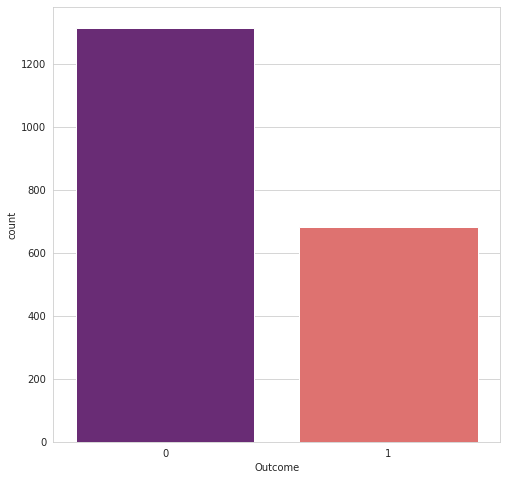

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = "Outcome", data = data,palette = "magma")

There are more than 1200 non-diabetic people and less than 700 diabetic people

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbed268c390>,
      dtype=object)

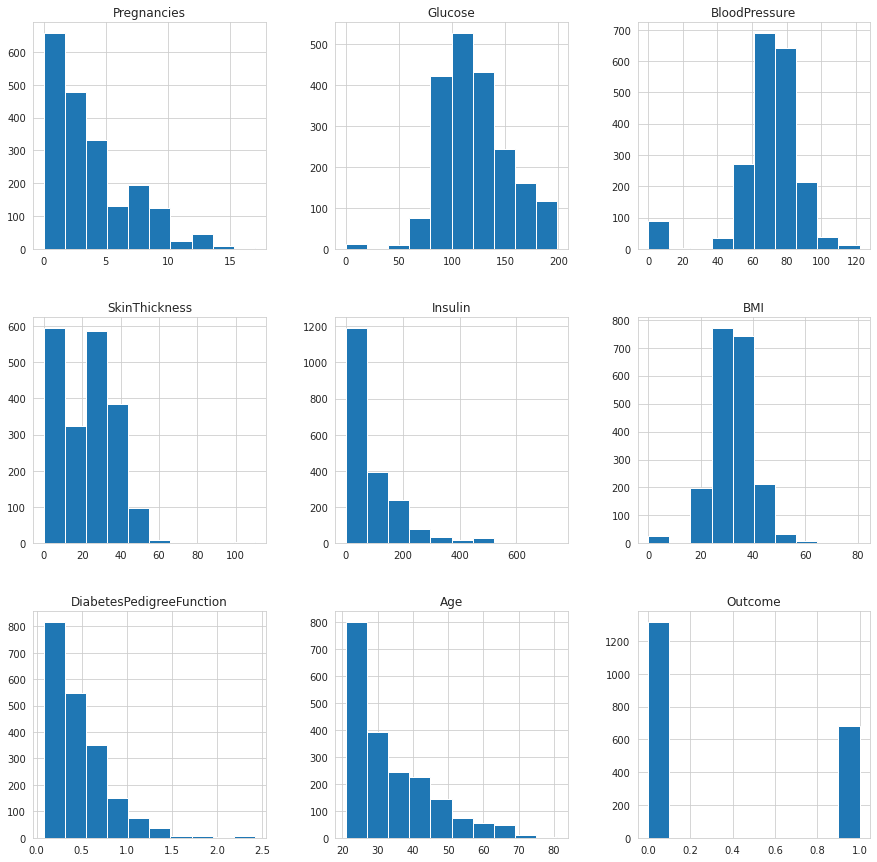

In [ ]:
data.hist(figsize = (15,15))

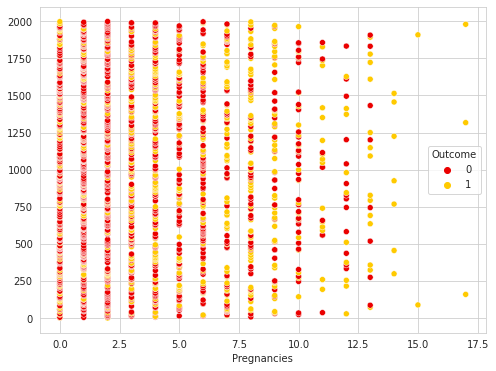

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x =data["Pregnancies"] ,y =data.index , hue = data["Outcome"] , palette = "hot")


There are more number of diabetic persons having pregnancies between 3-15

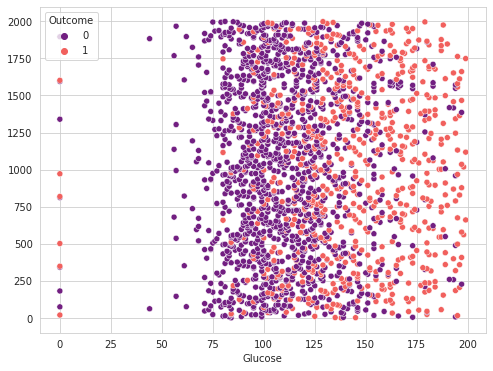

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x =data["Glucose"] ,y =data.index , hue = data["Outcome"] , palette = "magma")

 More number of diabetic patients have the glucose range between 125-200

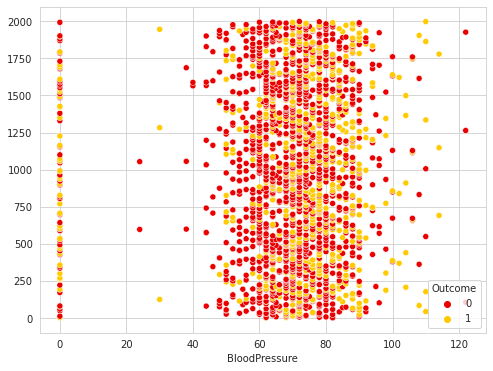

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x =data["BloodPressure"] ,y =data.index , hue = data["Outcome"] , palette = "hot")

More number of diabetic people have the blood pressure in the range 70-100 mm/Hg

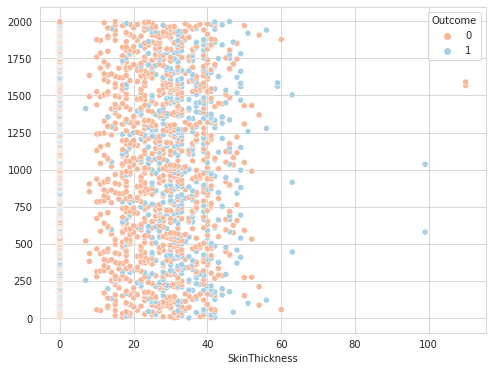

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x =data["SkinThickness"] ,y =data.index , hue = data["Outcome"] , palette = "RdBu")

More number of diabetic people have skin thickness ranging between 30 and 40 mm

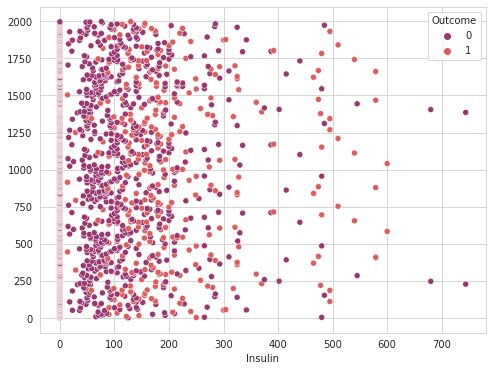

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x =data["Insulin"] ,y =data.index , hue = data["Outcome"] , palette = "flare_r")

More number of diabetic people have insulin between 150 and 300 (mu U/ml)

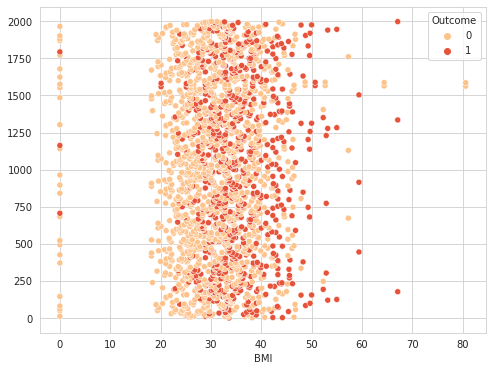

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x =data["BMI"] ,y =data.index , hue = data["Outcome"] , palette = "OrRd")

More diabetic patients have BMI value between 35-45  (weight in kg/(height in m)^2)

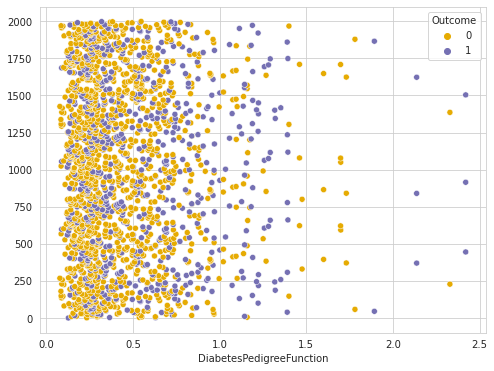

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x =data["DiabetesPedigreeFunction"] ,y =data.index , hue = data["Outcome"] , palette = "Dark2_r")

More diabetic people have DiabetesPedigreeFunction value between 0.5 -1.5

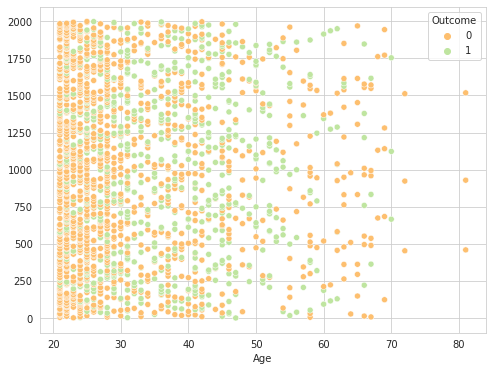

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x =data["Age"] ,y =data.index , hue = data["Outcome"] , palette = "Spectral")

More number of diabetic people are in the age between 30-60

CONCLUSIONS OF UNIVARIATE ANALYSIS:

1) More number of diabetic people have pregnancies between 3-15.

2) More number of diabetic people have the glucose range between 125-200.

3) More number of diabetic people have the blood pressure in the range 70-100 mm/Hg.

4) More number of diabetic people have skin thickness ranging between 30 and 40 mm.

5) More number of diabetic people have insulin between 150 and 300 (mu U/ml).

6) More number of diabetic people have BMI value between 35-45 (weight in kg/(height in m)^2).

7) More number of diabetic people have DiabetesPedigreeFunction value between 0.5 -1.5.

8) More number of diabetic people are in the age between 30-60.

# **MULTIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


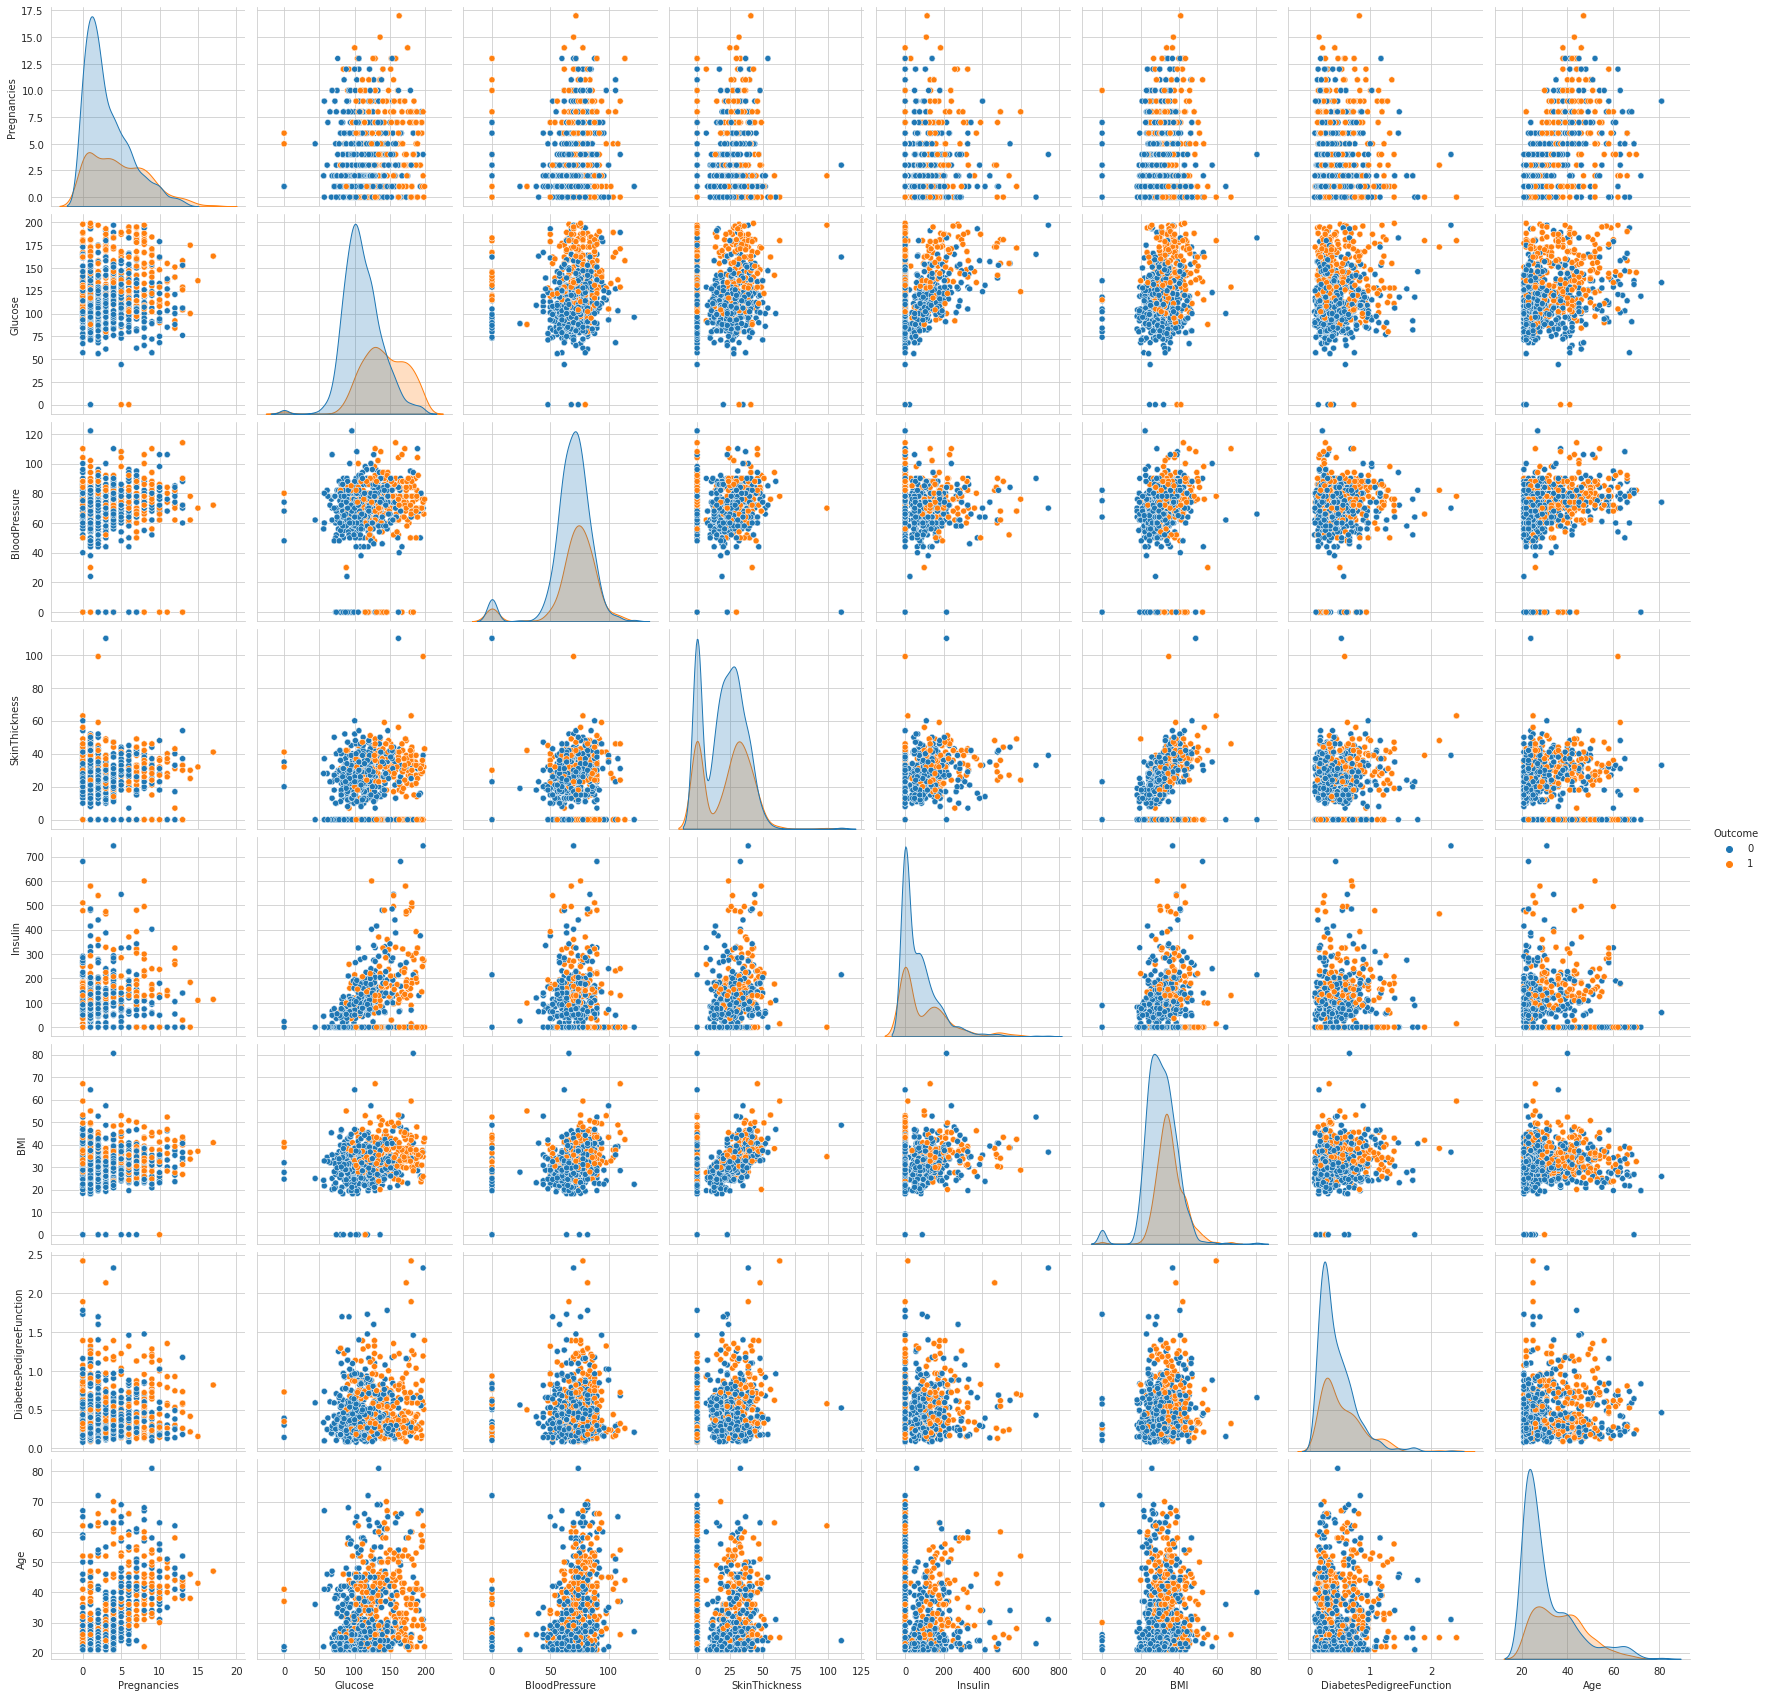

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data, hue = "Outcome",size = 3)

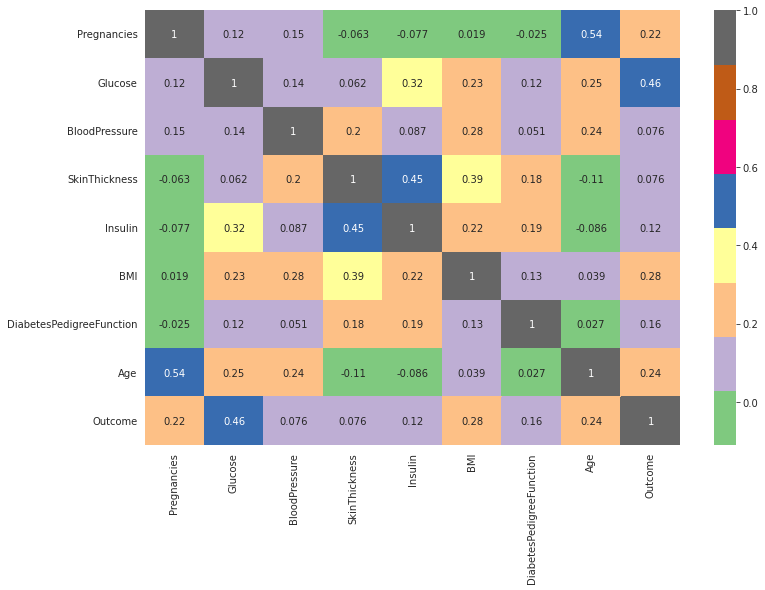

In [ ]:
plt.figure(figsize = (12,8))
corr_mat= data.corr()
sns.heatmap(data = corr_mat, annot = True, cmap = "Accent")

1) All independent features are less correlated to each other so there is no problemn of multicollinearity.

2) Glocose feature is more positiveley correlated with the output variable which means to say people having high glucose level tend to have more chances of being diabetic. 

3) Other features having positive correlation with the output variable are BMI followed by Age and Pregnancies.

***Checking for outliers***

In [ ]:
print(data[data["Glucose"] == 0].value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
1            0        68             35             0        32.0  0.389                     22   0          3
5            0        80             32             0        41.0  0.346                     37   1          3
6            0        68             41             0        39.0  0.727                     41   1          3
1            0        48             20             0        24.7  0.140                     22   0          2
                      74             20             23       27.7  0.299                     21   0          2
dtype: int64


In [ ]:
print(data[data["BloodPressure"] == 0].value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
3            80       0              0              0        0.0   0.174                     22   0          5
0            94       0              0              0        0.0   0.256                     25   0          4
             145      0              0              0        44.2  0.630                     31   1          4
2            99       0              0              0        22.2  0.108                     23   0          4
13           129      0              30             0        39.9  0.569                     44   1          3
6            96       0              0              0        23.7  0.190                     28   0          3
4            183      0              0              0        28.4  0.212                     36   1          3
3            116      0              0              0        23.5  0.187                     23   0          3
2     

In [ ]:
print(data[data["Insulin"] == 0].value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
2            89       90             30             0        33.5  0.292                     42   0          5
3            80       0              0              0        0.0   0.174                     22   0          5
4            99       68             38             0        32.8  0.145                     33   0          5
                      72             17             0        25.6  0.294                     28   0          5
6            166      74             0              0        26.6  0.304                     66   0          5
                                                                                                            ..
3            87       60             18             0        21.8  0.444                     21   0          1
2            138      62             35             0        33.6  0.127                     47   1          1
0     

In [ ]:
print(data[data["BMI"] == 0].value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  DiabetesPedigreeFunction  Age  Outcome
3            80       0              0              0        0.0  0.174                     22   0          5
0            94       0              0              0        0.0  0.256                     25   0          4
             102      75             23             0        0.0  0.572                     21   0          3
             118      64             23             89       0.0  1.731                     21   0          3
5            136      82             0              0        0.0  0.640                     69   0          3
10           115      0              0              0        0.0  0.261                     30   1          3
2            74       0              0              0        0.0  0.102                     22   0          2
             84       0              0              0        0.0  0.304                     21   0          2
7            10

In [ ]:
print(data[data["SkinThickness"] == 0].value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
5            110      68             0              0        26.0  0.292                     30   0          5
8            194      80             0              0        26.1  0.551                     67   0          5
3            80       0              0              0        0.0   0.174                     22   0          5
6            166      74             0              0        26.6  0.304                     66   0          5
             137      61             0              0        24.2  0.151                     55   0          4
                                                                                                            ..
             114      0              0              0        0.0   0.189                     26   0          1
0            111      65             0              0        24.6  0.660                     31   0          1
13    

In [ ]:
print(data[data["DiabetesPedigreeFunction"] == 0].value_counts())

Series([], dtype: int64)


In [ ]:
print(data[data["Age"] == 0].value_counts())

Series([], dtype: int64)


***Removing the outliers***

In [ ]:
# A living person cannot have zero glucose value
modified_dataset= data[(data["Glucose"] != 0)]

# A living person cannot have zero blood pressure
modified_dataset1 = modified_dataset[(modified_dataset["BloodPressure"] != 0)]

#A living person cannot have a zero insulin value
modified_dataset2 = modified_dataset1[(modified_dataset1["Insulin"] != 0)]

#  BMI value should not be zero
modified_dataset3 = modified_dataset2[(modified_dataset2["BMI"] != 0)]

# skin thickness should not be zero
modified_dataset4 = modified_dataset3[(modified_dataset3["SkinThickness"] != 0)]
modified_dataset4.shape

(1035, 9)

***Checking for outliers after removal of outliers***

In [ ]:
print(modified_dataset4[modified_dataset4["Glucose"] == 0].value_counts())
print(modified_dataset4[modified_dataset4["BloodPressure"] == 0].value_counts())
print(modified_dataset4[modified_dataset4["Insulin"] == 0].value_counts())
print(modified_dataset4[modified_dataset4["BMI"] == 0].value_counts())
print(modified_dataset4[modified_dataset4["SkinThickness"] == 0].value_counts())

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


In [ ]:
final_data = modified_dataset4
final_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
8,2,83,65,28,66,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...,...
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
final_data.shape


(1035, 9)

In [ ]:
final_data["Outcome"].value_counts()

0    698
1    337
Name: Outcome, dtype: int64

# **MODEL TRAINING**

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

***Standardising the data***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***KNN***

In [ ]:
best_accuracy = 0.0
n_neighbors = 0
for i in np.arange(1,16,1):
  temp_classifier = KNeighborsClassifier(n_neighbors= i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for K={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    n_neighbors = i
print('--------------------------------------------')
print('The best accuracy is {}% with K value as {}'.format(round(best_accuracy*100, 2), round(n_neighbors,1)))

Accuracy score for K=1 is: 98.0%
Accuracy score for K=2 is: 90.25%
Accuracy score for K=3 is: 88.0%
Accuracy score for K=4 is: 82.5%
Accuracy score for K=5 is: 78.75%
Accuracy score for K=6 is: 81.75%
Accuracy score for K=7 is: 81.75%
Accuracy score for K=8 is: 81.0%
Accuracy score for K=9 is: 80.0%
Accuracy score for K=10 is: 78.25%
Accuracy score for K=11 is: 78.25%
Accuracy score for K=12 is: 78.75%
Accuracy score for K=13 is: 78.75%
Accuracy score for K=14 is: 77.25%
Accuracy score for K=15 is: 77.25%
--------------------------------------------
The best accuracy is 98.0% with K value as 1


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred1= knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score,log_loss,precision_score,recall_score,f1_score
acc1 = accuracy_score(y_test,y_pred1)
acc1


0.7875

In [ ]:
confusion1 = confusion_matrix(y_test,y_pred1)
confusion1

array([[238,  34],
       [ 51,  77]])

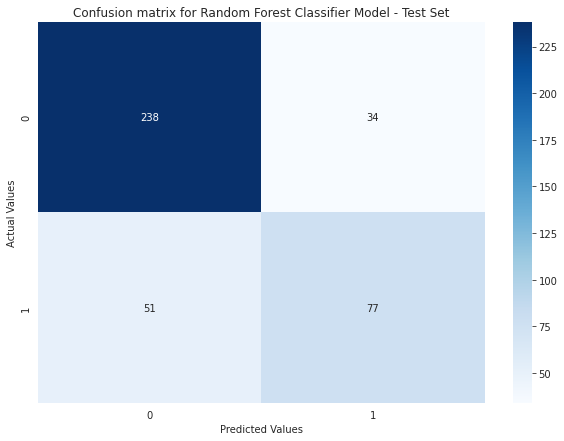

In [ ]:
plt.figure(figsize=(10,7))
p = sns.heatmap(confusion1, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Precision1:",precision_score(y_test,y_pred1))
print("Recall1:",recall_score(y_test,y_pred1))
print("F1 Score1:",f1_score(y_test,y_pred1))

Precision1: 0.6936936936936937
Recall1: 0.6015625
F1 Score1: 0.6443514644351465


In [ ]:
pred_prob = knn.predict_proba(X_test)
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score1 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score1)

0.893267463235294


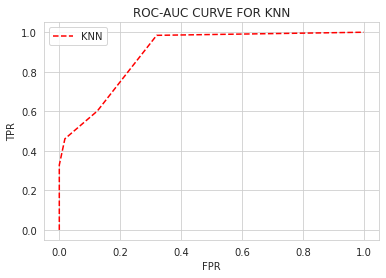

In [ ]:
plt.plot(fpr1,tpr1,color = "red",linestyle = "--",label = "KNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR KNN")
plt.legend()
plt.show()

In [ ]:
logloss1 = log_loss(y_test,y_pred1)
logloss1

7.339557949700087

***LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
best_accuracy = 0.0
C_val = 0.0
for i in np.arange(0.1,1.5,0.1):
  temp_classifier = LogisticRegression(penalty='l2',dual=False, tol=0.0001, C= i, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    C_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(C_val,1)))

Accuracy score for C=0.1 is: 78.0%
Accuracy score for C=0.2 is: 78.0%
Accuracy score for C=0.3 is: 78.0%
Accuracy score for C=0.4 is: 78.0%
Accuracy score for C=0.5 is: 78.0%
Accuracy score for C=0.6 is: 78.0%
Accuracy score for C=0.7 is: 78.0%
Accuracy score for C=0.8 is: 78.0%
Accuracy score for C=0.9 is: 78.0%
Accuracy score for C=1.0 is: 78.0%
Accuracy score for C=1.1 is: 78.0%
Accuracy score for C=1.2 is: 78.0%
Accuracy score for C=1.3 is: 78.0%
Accuracy score for C=1.4 is: 78.0%
--------------------------------------------
The best accuracy is 78.0% with C value as 0.1


In [ ]:
logis = LogisticRegression(penalty='l2',dual=False, tol=0.0001, C= 0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logis.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [ ]:
y_pred2 = logis.predict(X_test)

In [ ]:
acc2 = accuracy_score(y_test,y_pred3)
acc2

0.8275

In [ ]:
confusion2= confusion_matrix(y_test,y_pred3)
confusion2

array([[251,  21],
       [ 48,  80]])

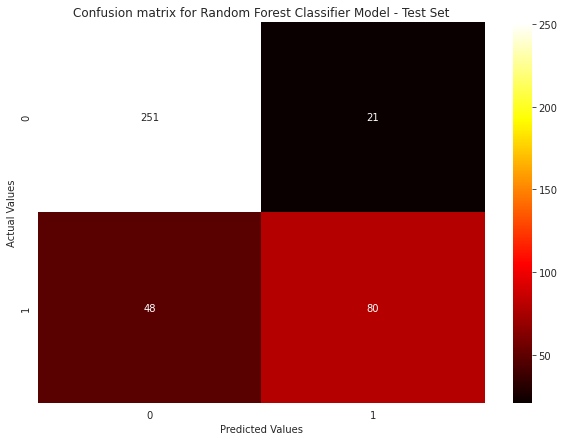

In [ ]:
plt.figure(figsize=(10,7))
p = sns.heatmap(confusion2, annot=True, cmap="hot", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Precision2:",precision_score(y_test,y_pred2))
print("Recall2:",recall_score(y_test,y_pred2))
print("F1 Score2:",f1_score(y_test,y_pred2))

Precision2: 0.7040816326530612
Recall2: 0.5390625
F1 Score2: 0.6106194690265487


In [ ]:
pred_prob = logis.predict_proba(X_test)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score2 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score2)


0.8333237591911765


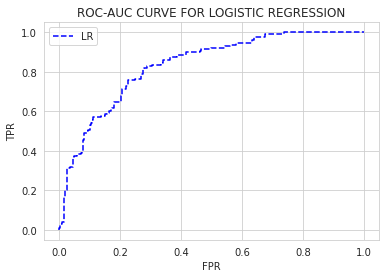

In [ ]:
plt.plot(fpr2,tpr2,color = "blue",linestyle = "--",label = "LR")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR LOGISTIC REGRESSION")
plt.legend()
plt.show()

In [ ]:
logloss2 = log_loss(y_test,y_pred2)
logloss2

7.59858877769404

***SVC***

In [ ]:
from sklearn.svm import SVC

In [ ]:
best_accuracy = 0.0
C_val = 0.0
for i in np.arange(0.1,1.5,0.1):
  temp_classifier = SVC(C = i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    C_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(C_val,1)))

Accuracy score for C=0.1 is: 81.25%
Accuracy score for C=0.2 is: 81.0%
Accuracy score for C=0.3 is: 81.0%
Accuracy score for C=0.4 is: 80.75%
Accuracy score for C=0.5 is: 81.0%
Accuracy score for C=0.6 is: 81.5%
Accuracy score for C=0.7 is: 81.5%
Accuracy score for C=0.8 is: 81.0%
Accuracy score for C=0.9 is: 80.5%
Accuracy score for C=1.0 is: 81.5%
Accuracy score for C=1.1 is: 81.5%
Accuracy score for C=1.2 is: 82.0%
Accuracy score for C=1.3 is: 82.5%
Accuracy score for C=1.4 is: 82.75%
--------------------------------------------
The best accuracy is 82.75% with C value as 1.4


In [ ]:
support = SVC(C = 1.4,probability=True)
support.fit(X_train,y_train)

SVC(C=1.4, probability=True)

In [ ]:
y_pred3 = support.predict(X_test)

In [ ]:
acc3 = accuracy_score(y_test,y_pred3)
acc3

0.8275

In [ ]:
confusion3 = confusion_matrix(y_test,y_pred3)
confusion3

array([[251,  21],
       [ 48,  80]])

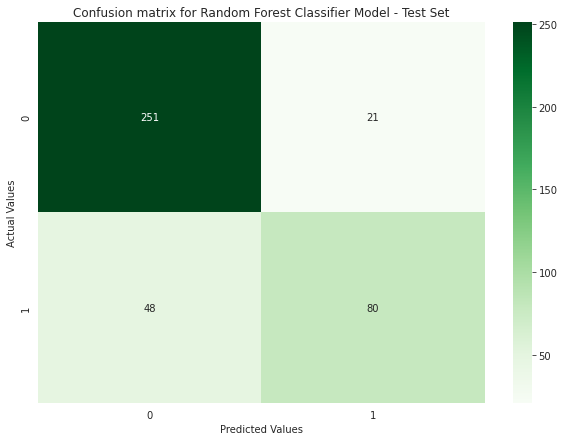

In [ ]:
plt.figure(figsize=(10,7))
p = sns.heatmap(confusion3, annot=True, cmap="Greens", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Precision3:",precision_score(y_test,y_pred3))
print("Recall3:",recall_score(y_test,y_pred3))
print("F1 Score3:",f1_score(y_test,y_pred3))

Precision3: 0.7920792079207921
Recall3: 0.625
F1 Score3: 0.6986899563318777


In [ ]:
pred_prob = support.predict_proba(X_test)
fpr3,tpr3,thresh3 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score3 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score3)

0.8871783088235293


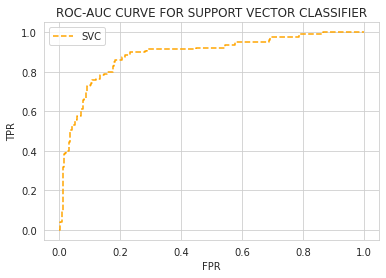

In [ ]:
plt.plot(fpr3,tpr3,color = "orange",linestyle = "--",label = "SVC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR SUPPORT VECTOR CLASSIFIER")
plt.legend()
plt.show()

In [ ]:
logloss3 = log_loss(y_test,y_pred3)
logloss3

5.957980906987177

***DECISION TREE***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=1024)

In [ ]:
tree =  DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=1024)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=1024)

In [ ]:
y_pred4 = tree.predict(X_test)

In [ ]:
acc4 = accuracy_score(y_test,y_pred4)
acc4

0.8575

In [ ]:
confusion4 = confusion_matrix(y_test,y_pred4)
confusion4

array([[247,  25],
       [ 32,  96]])

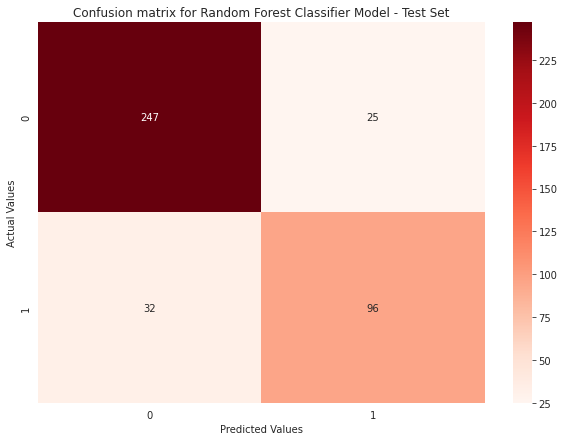

In [ ]:
plt.figure(figsize=(10,7))
p = sns.heatmap(confusion4, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Precision4:",precision_score(y_test,y_pred4))
print("Recall4:",recall_score(y_test,y_pred4))
print("F1 Score4:",f1_score(y_test,y_pred4))

Precision4: 0.7933884297520661
Recall4: 0.75
F1 Score4: 0.7710843373493976


In [ ]:
pred_prob = tree.predict_proba(X_test)
fpr4,tpr4,thresh4 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score4 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score4)

0.9366957720588235


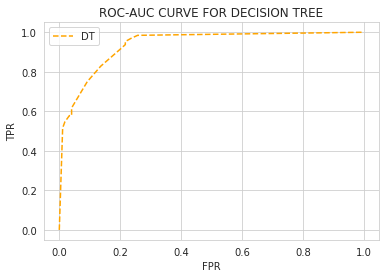

In [ ]:
plt.plot(fpr4,tpr4,color = "orange",linestyle = "--",label = "DT")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR DECISION TREE")
plt.legend()
plt.show()

In [ ]:
logloss4 = log_loss(y_test,y_pred4)
logloss4

4.921825611114159

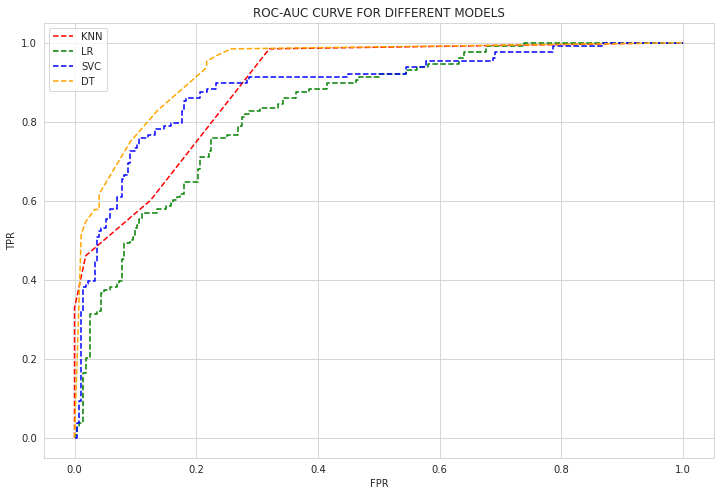

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(fpr1,tpr1,color = "red",linestyle = "--",label = "KNN")
plt.plot(fpr2,tpr2,color = "green",linestyle = "--",label = "LR")
plt.plot(fpr3,tpr3,color = "blue",linestyle = "--",label = "SVC")
plt.plot(fpr4,tpr4,color = "orange",linestyle = "--",label = "DT")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR DIFFERENT MODELS")
plt.legend(loc=0)
plt.show()

<function matplotlib.pyplot.show>

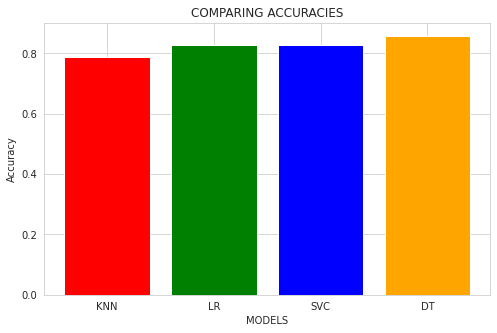

In [ ]:
plt.figure(figsize = (8,5))
accuracy = [acc1,acc2,acc3,acc4]
models = ["KNN","LR","SVC","DT"]
color = ["red","green","blue","orange"]
plt.bar(models,accuracy,color = color)
plt.xlabel("MODELS")
plt.ylabel("Accuracy")
plt.title("COMPARING ACCURACIES")
plt.show

<function matplotlib.pyplot.show>

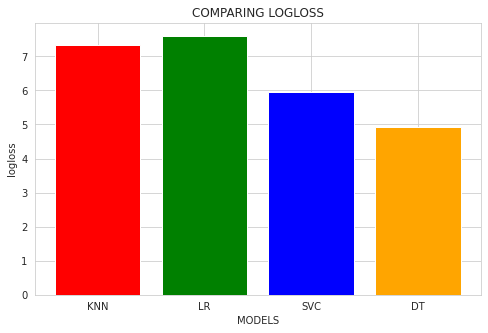

In [ ]:
plt.figure(figsize = (8,5))
accuracy = [logloss1,logloss2,logloss3,logloss4]
models = ["KNN","LR","SVC","DT"]
color = ["red","green","blue","orange"]
plt.bar(models,accuracy,color = color)
plt.xlabel("MODELS")
plt.ylabel("logloss")
plt.title("COMPARING LOGLOSS")
plt.show

***Prediction Using Decision Tree***

In [ ]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return tree.predict(x)

In [ ]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [ ]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


In [ ]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.
